In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import axes3d

In [2]:
def plot_density(x,y,fig,ax):
    x = np.array(x)
    y = np.array(y)

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, s=50, edgecolor='')
    plt.show()

In [3]:
def get_feasable_point(known_values, mask):
    choices = np.random.randn(n, n)
    
    anti_mask = np.ones(np.shape(mask)) - mask
    anti_mask = np.where(np.array(anti_mask) < 0.5, 0, 1)
    
    choices[np.ma.make_mask(mask)] = 0
    
    known_vals = np.copy(known_values)
    known_vals[np.ma.make_mask(anti_mask)] = 0
    
    point = known_vals + choices
    
    return point

In [14]:
# Define a matrix, mask and noise
p = 0.75
rank = 1

n = 4

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.ones([n,n])
mask[0,0] = 0



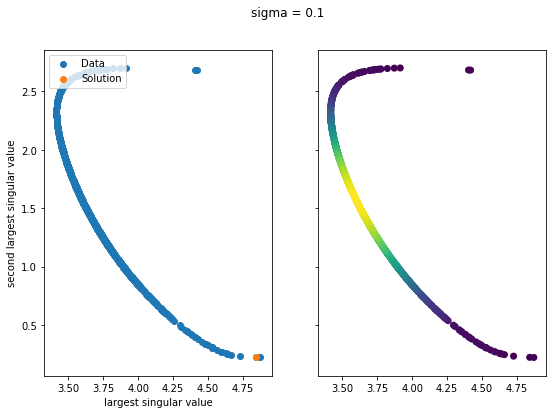

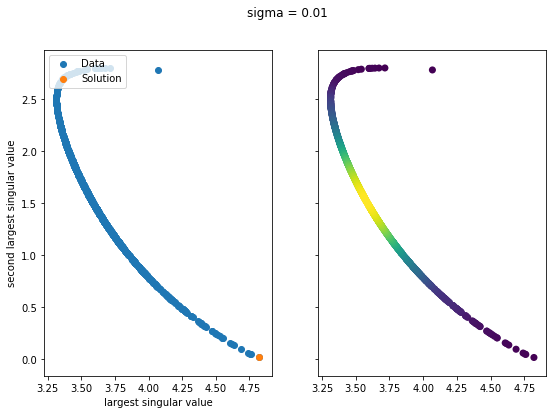

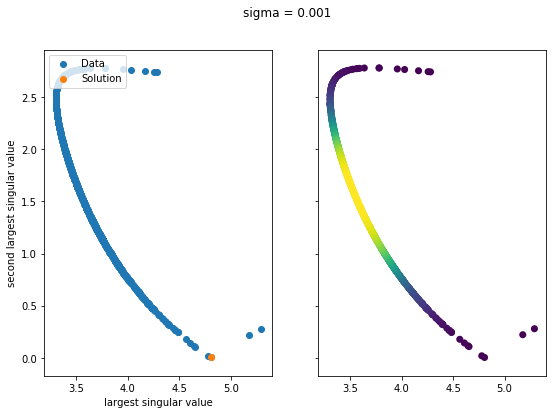

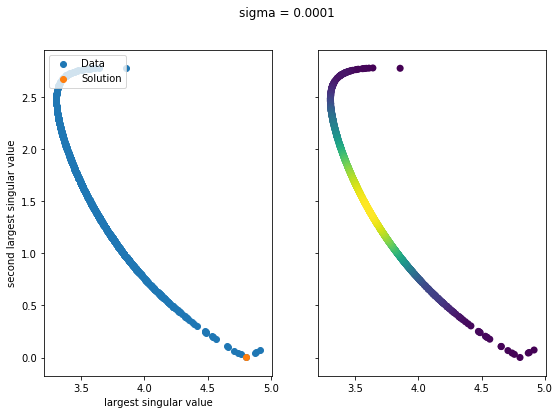

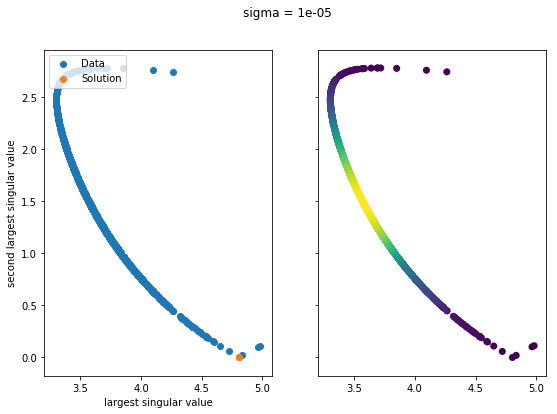

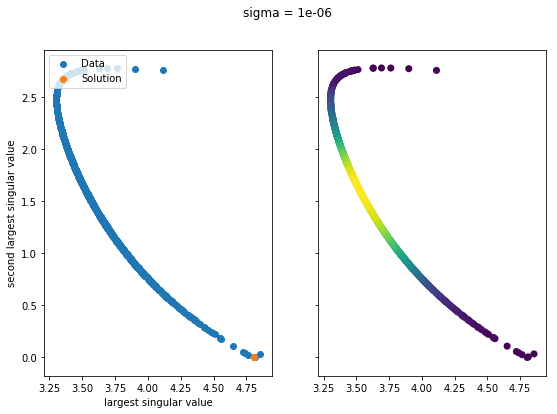

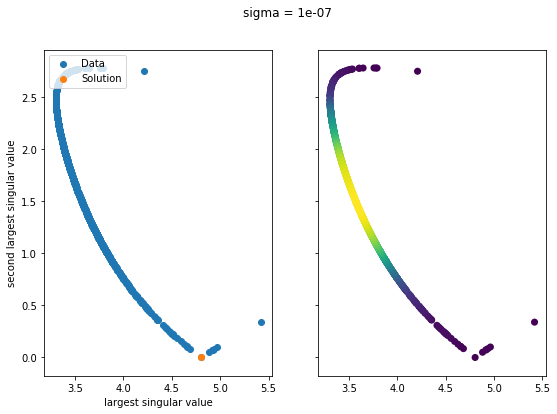

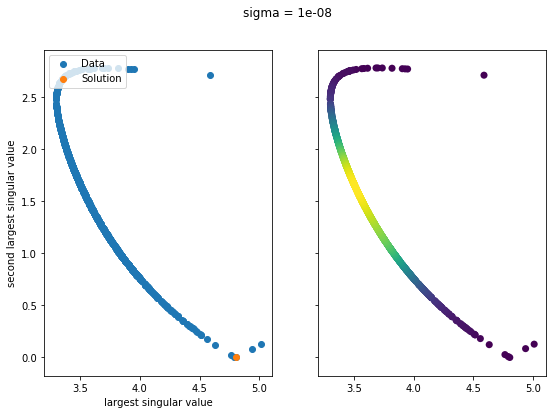

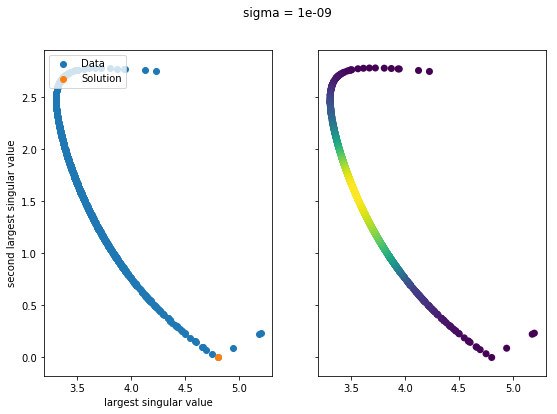

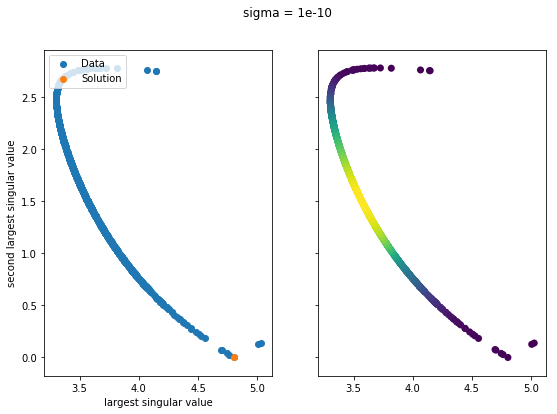

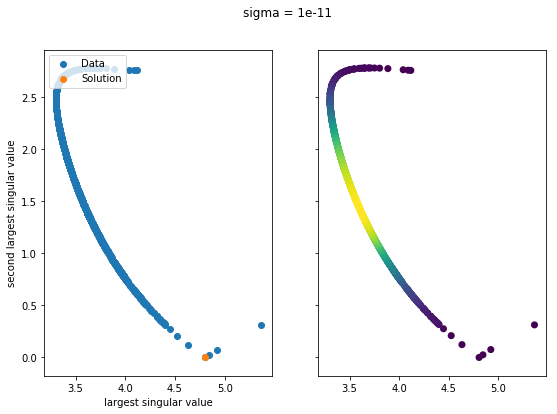

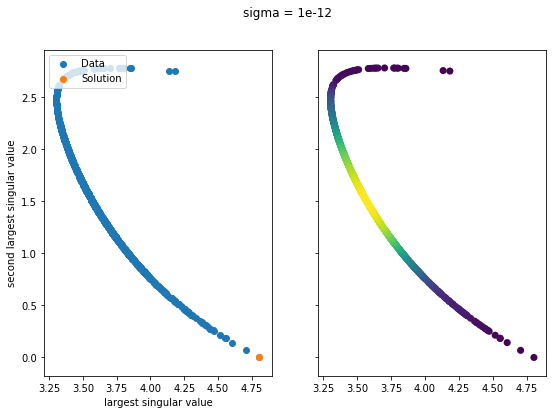

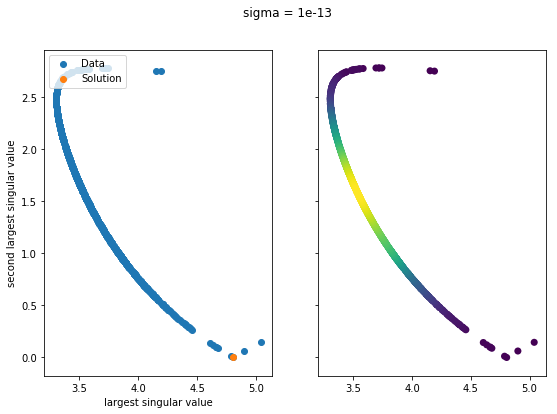

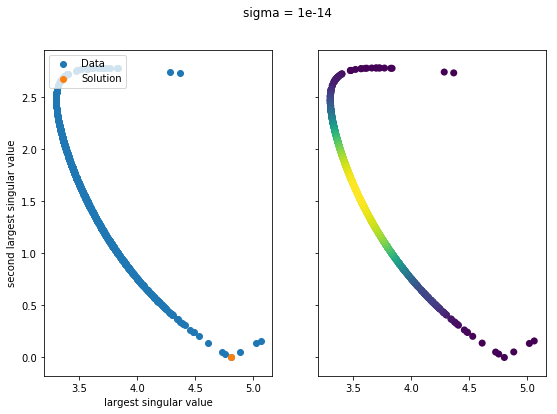

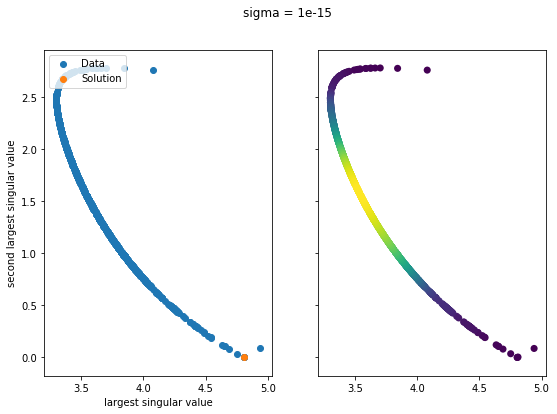

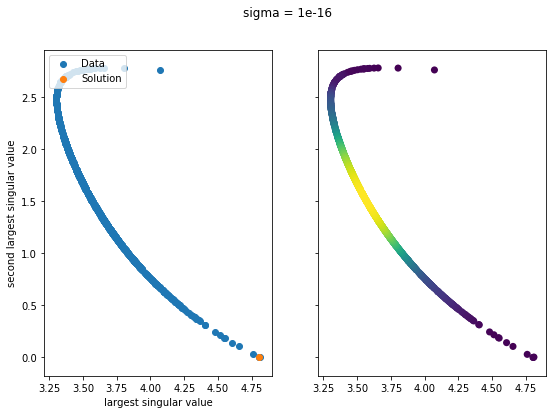

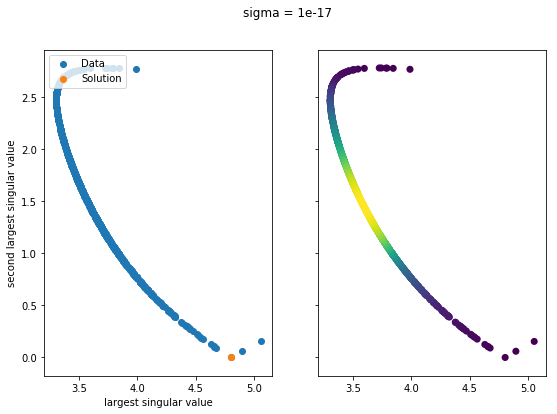

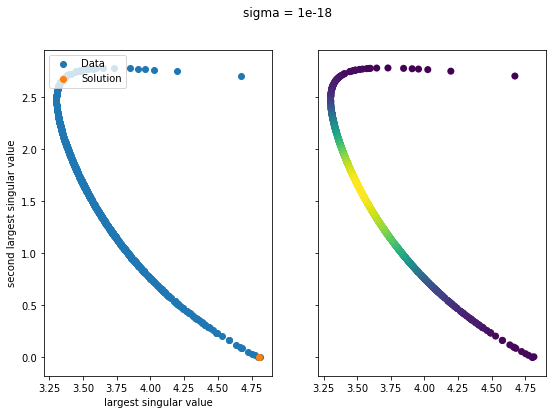

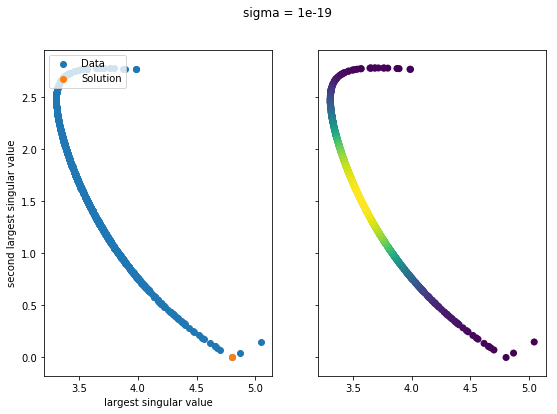

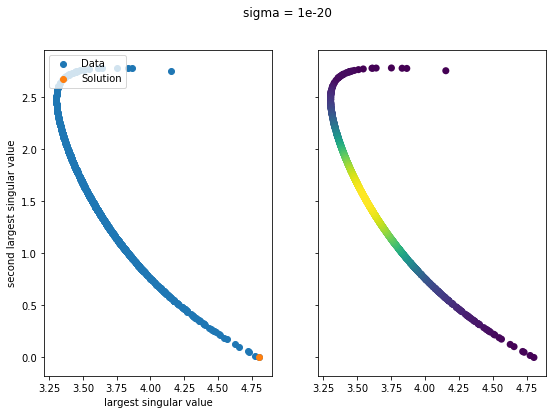

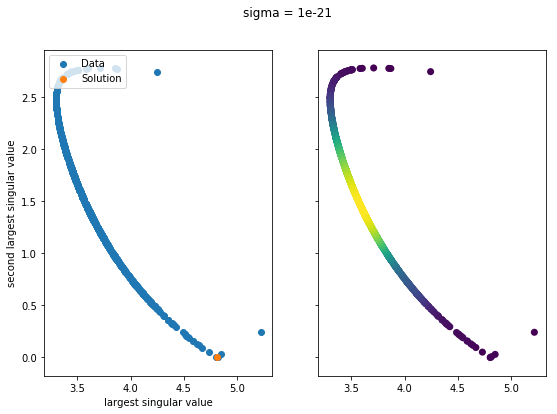

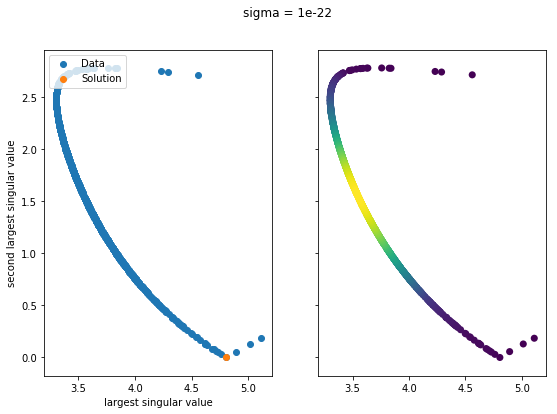

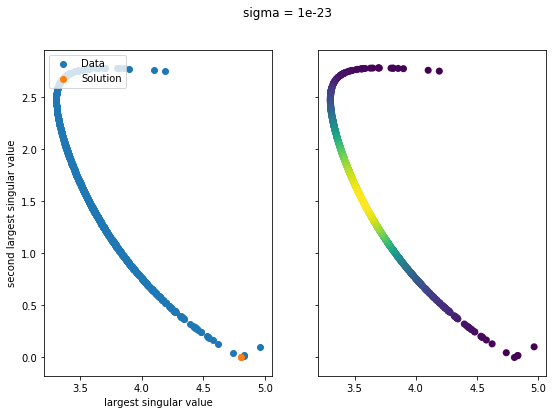

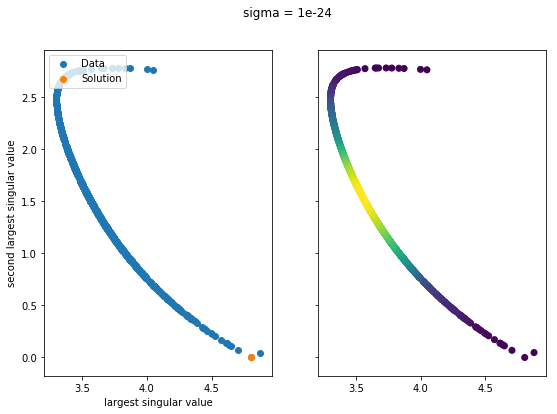

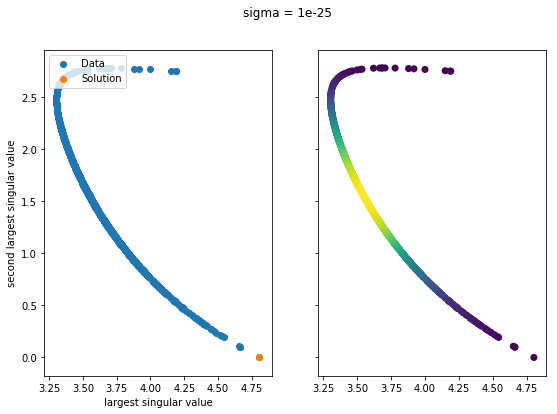

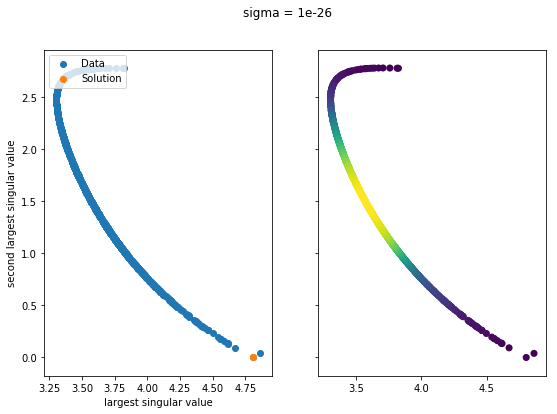

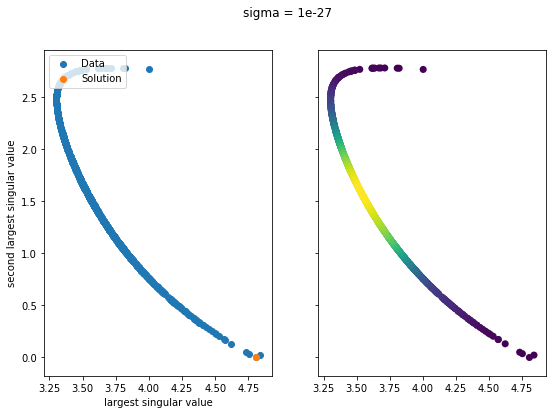

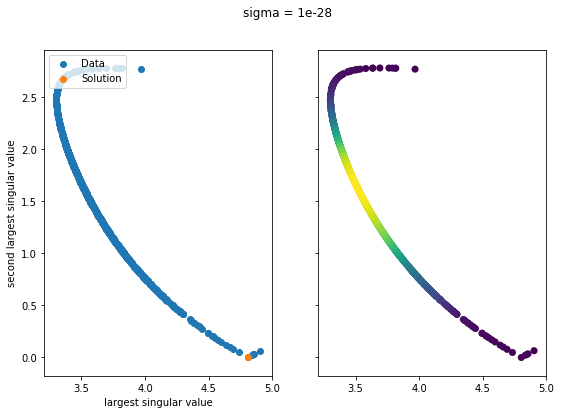

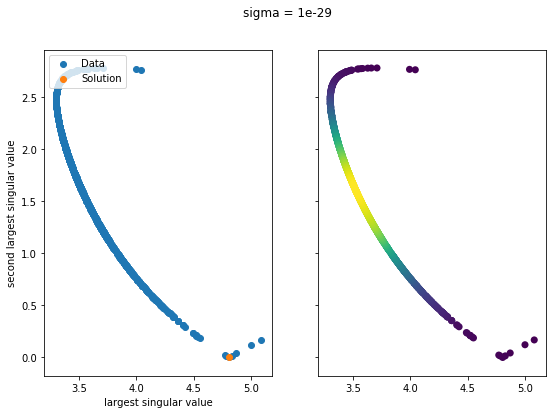

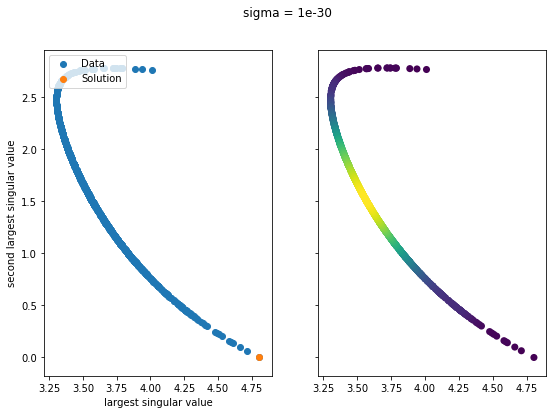

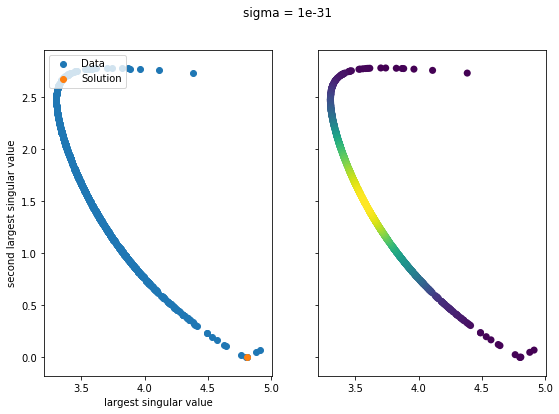

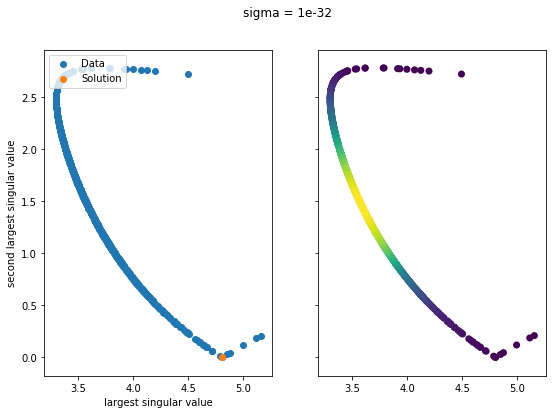

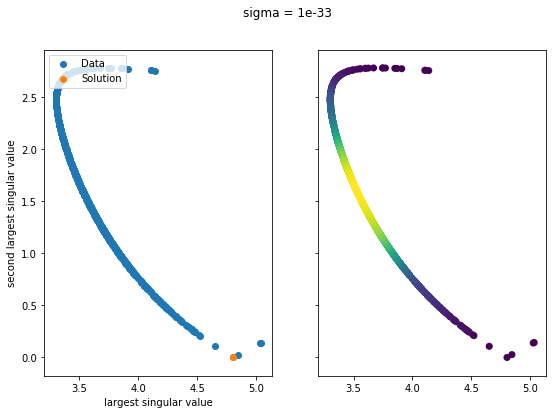

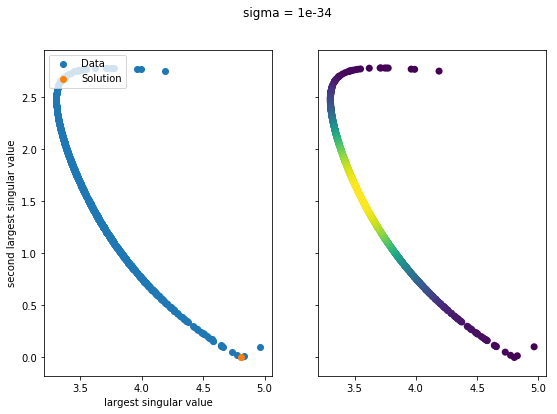

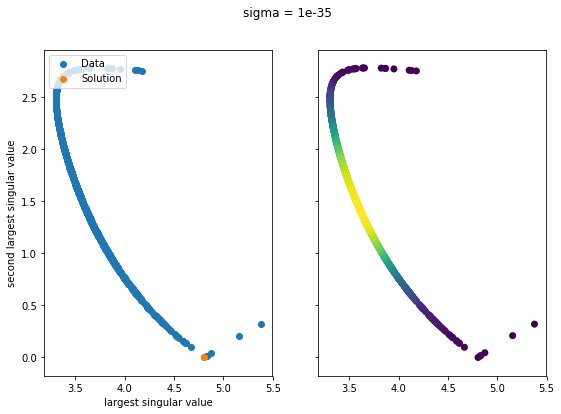

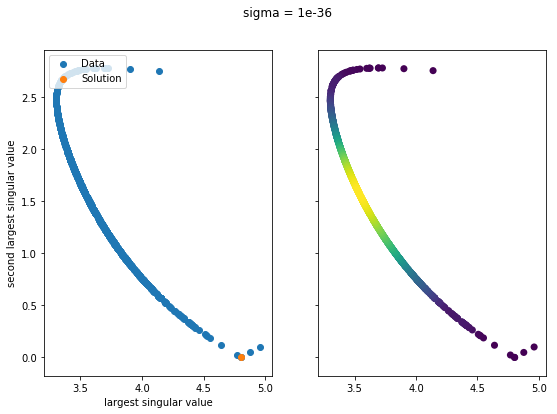

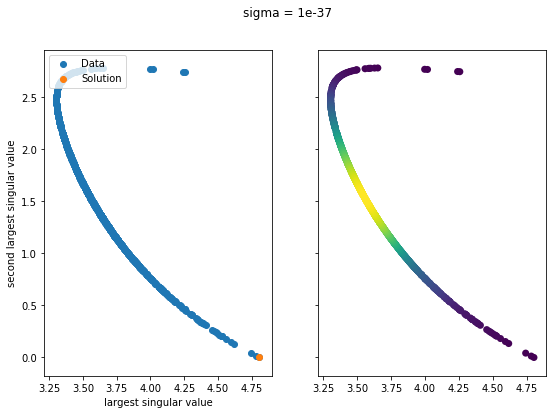

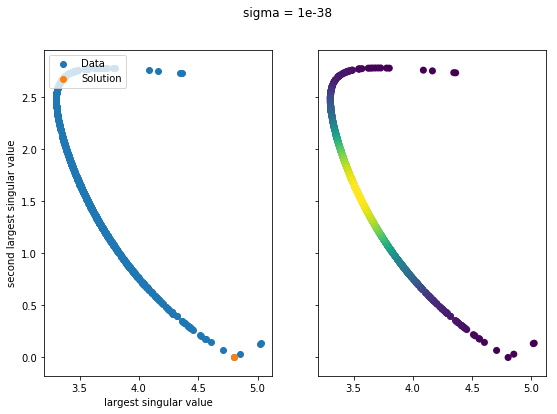

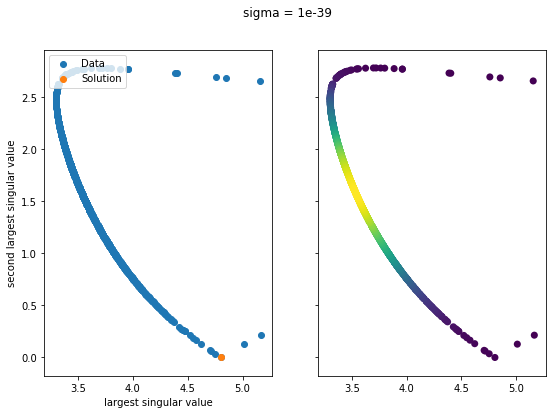

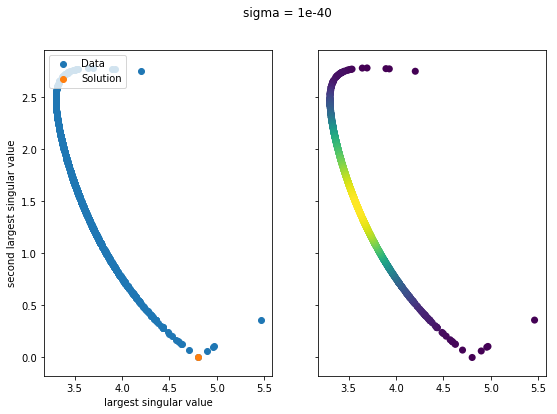

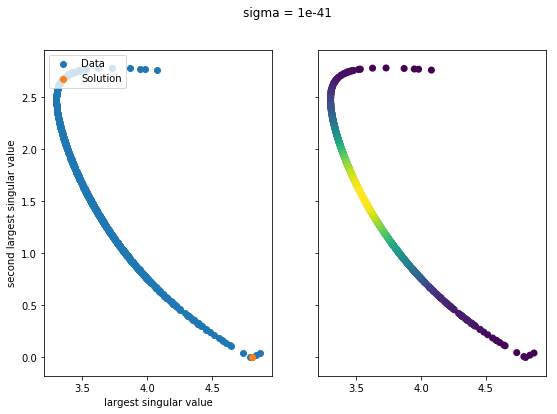

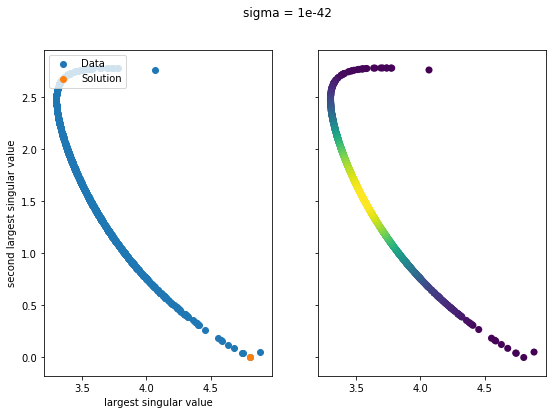

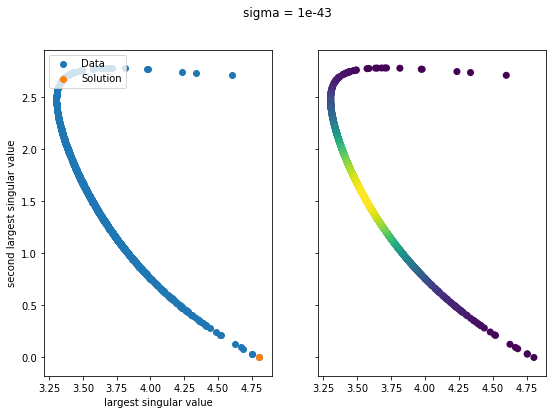

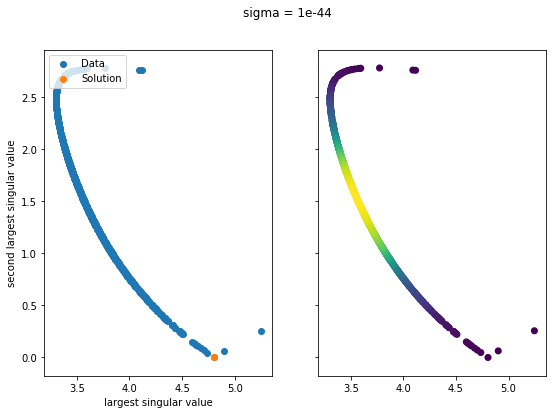

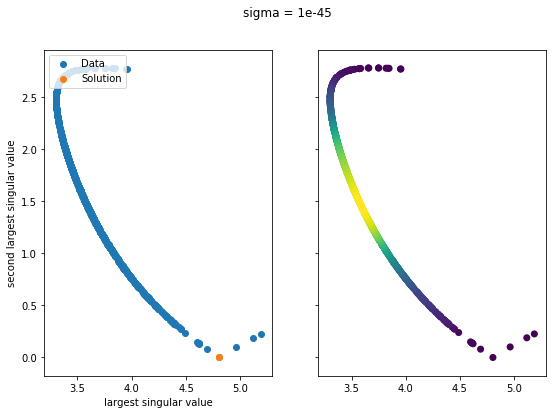

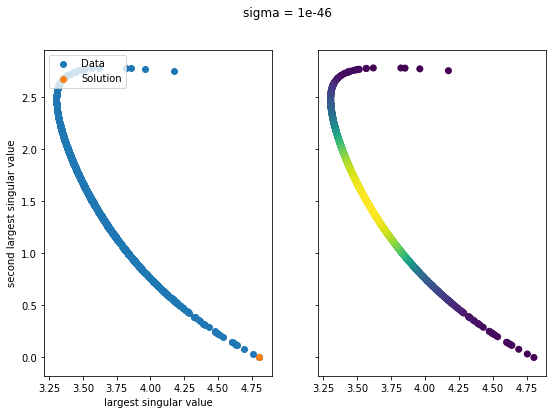

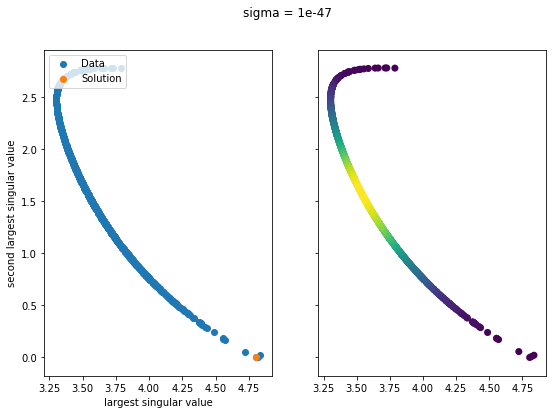

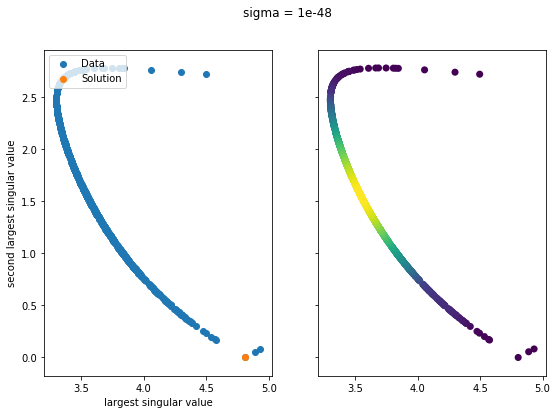

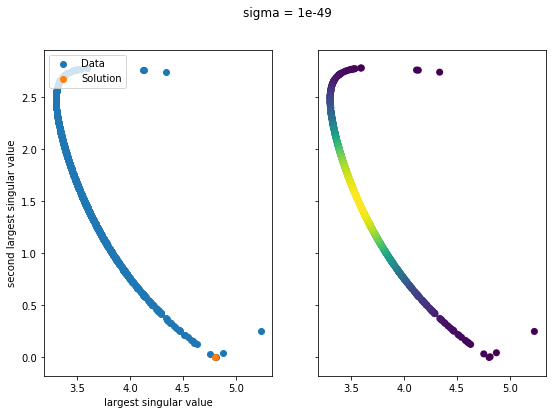

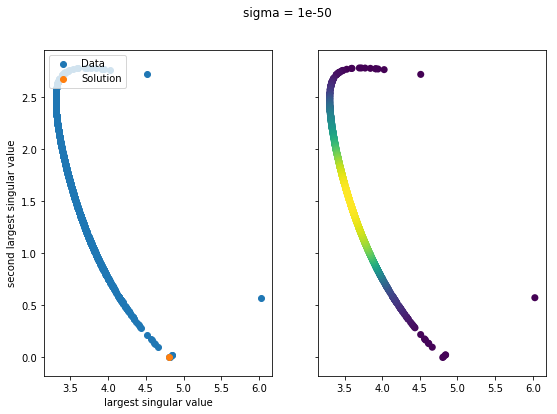

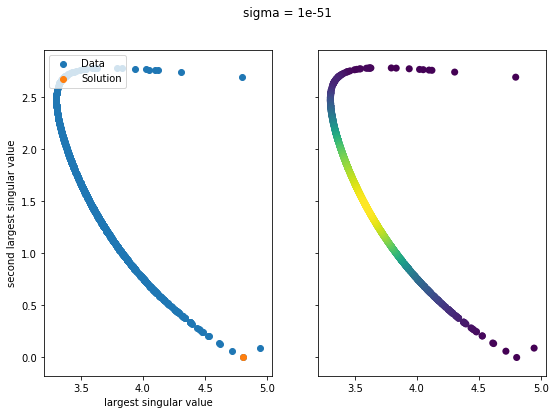

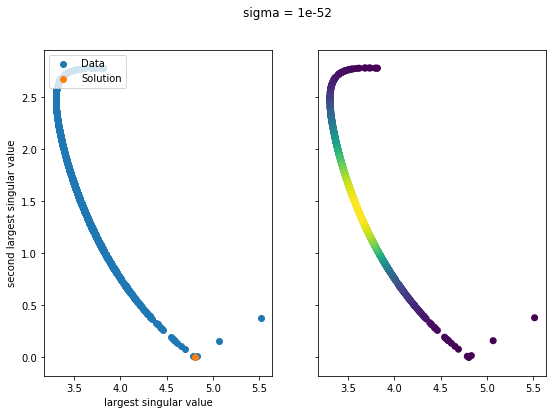

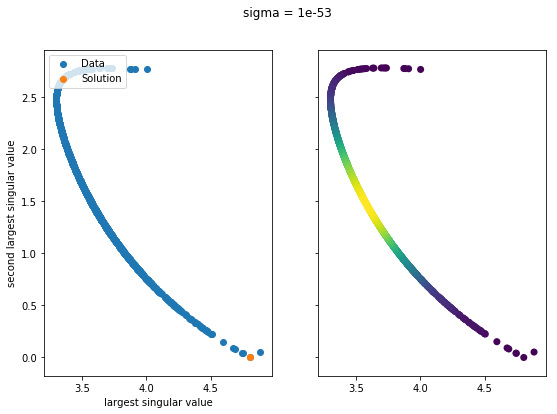

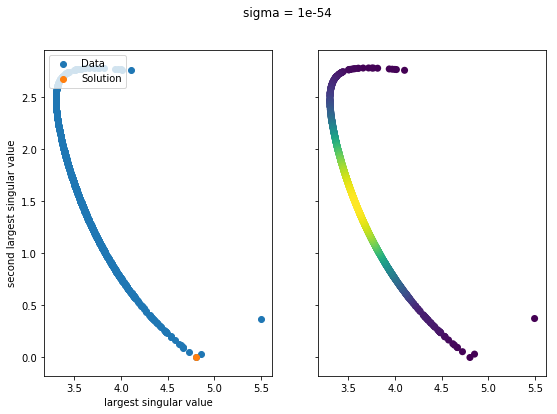

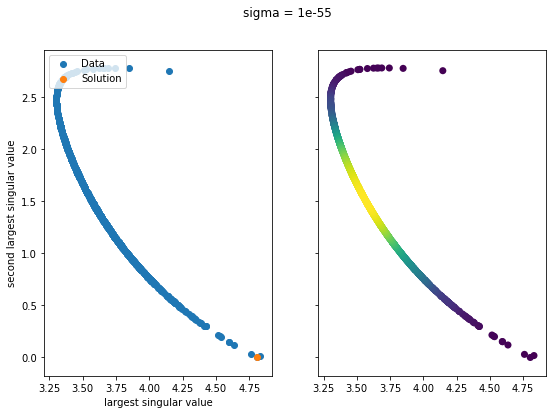

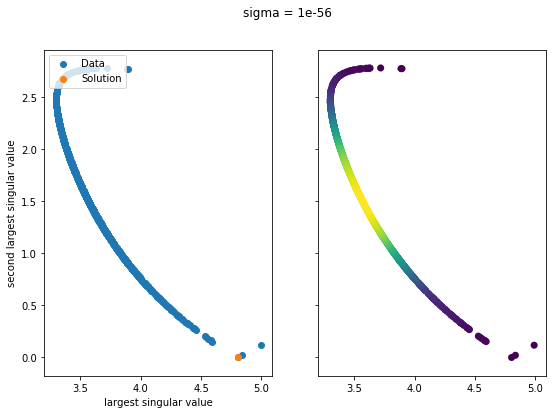

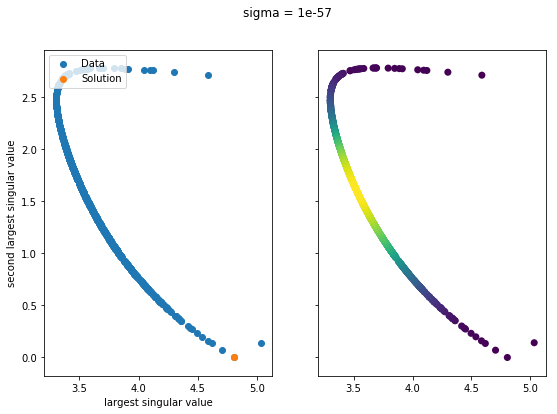

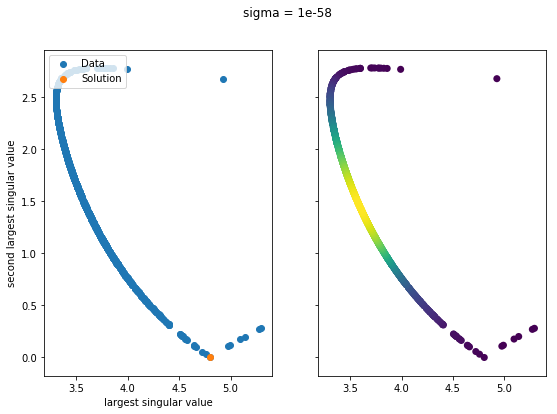

In [ ]:

for si in range(1,100):
    sigma = 10**(-si)
    noise = sigma * np.random.randn(n, n)
    known_values = noise + original

    iters = 1000

    S = []

    for i in range(iters):
        S.append(np.linalg.svd(get_feasable_point(known_values, mask), compute_uv=False))

    # append the desired solution
    S.append(np.linalg.svd(known_values, compute_uv=False))

    S = np.array(S)

    C = np.zeros(iters+1)
    C[-1] = 1
    C = np.where(np.array(C) == 0, 0, 1)

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(9, 6))
    fig.suptitle("sigma = " + str(sigma))

    ax1.scatter(S[:,0], S[:,1], label='Data')
    ax1.scatter(S[-1,0], S[-1,1], label='Solution')
    ax1.legend(loc='upper left')
    ax1.set_xlabel('largest singular value')
    ax1.set_ylabel('second largest singular value')

    plot_density(S[:,0], S[:,1], fig, ax2)
    ax2.set_xlabel('largest singular value')

<IPython.core.display.Javascript object>


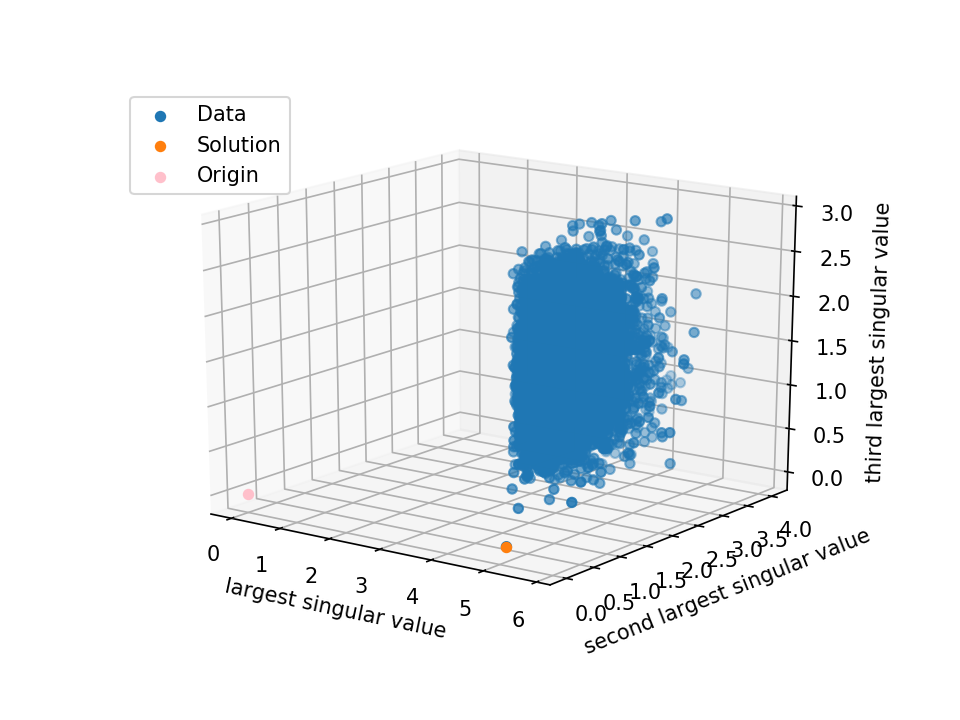

Text(0.5,0,'third largest singular value')

In [335]:
# get a nice 3d projection
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(S)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(S[:,0], S[:,1], S[:,2], label='Data')
ax.scatter(S[-1,0], S[-1,1], S[-1,2], label='Solution')
ax.scatter(0,0,0, c='pink', label='Origin')
ax.legend(loc='upper left')

ax.set_xlabel('largest singular value')
ax.set_ylabel('second largest singular value')
ax.set_zlabel('third largest singular value')

NameError: name 'known_values' is not defined